# Comparison of Different Models of Naive Bayes

## Importing Packages

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.naive_bayes as nb
import sklearn.feature_extraction.text as text
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

## Defining Methods for Processing

In [13]:
def predict_on_model(model, model_name, X_train, X_test, Y_train, Y_test):
        model.fit(X_train, Y_train)
        Y_pred = model.predict(X_test)
        accuracy = accuracy_score(Y_test, Y_pred)
        print (f'Accuracy Score on "{model_name.ljust(25," ")}"- ', accuracy)
        return accuracy

def getCountVectorizer(min_df, ngram_range, stop_words, binary):
	return text.CountVectorizer(min_df = min_df, ngram_range=ngram_range, stop_words=stop_words, binary=binary)

def getTfIdfVectorizer(min_df, ngram_range, stop_words, binary):
	return TfidfVectorizer(min_df = min_df, ngram_range=ngram_range, stop_words=stop_words, binary=binary)

## Reading CSV

In [6]:
#Reading Data File
df = pd.read_csv('tweets_01-08-2021.csv')

## Data Pre-Processing

In [7]:
#Pre-processing and Training, Testing Data
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year

## Defining Data Model to hold results

In [21]:
results=pd.DataFrame(columns=['Epoch',
'countVec_BernoulliNB_binarized','countVec_MultinomialNB_binarized','countVec_ComplementNB_binarized',
'countVec_BernoulliNB_Nonbinarized','countVec_MultinomialNB_Nonbinarized','countVec_ComplementNB_Nonbinarized',
'tfIdfVec_BernoulliNB_binarized','tfIdfVec_MultinomialNB_binarized','tfIdfVec_ComplementNB_binarized',
'tfIdfVec_BernoulliNB_Nonbinarized','tfIdfVec_MultinomialNB_Nonbinarized','tfIdfVec_ComplementNB_Nonbinarized'])

## Running Simulation for Different Models

In [22]:
for epoch in range(1,11):
        print("="*100)
        print(f"Simulation {epoch}:\n")
        X_train, X_test, Y_train, Y_test = train_test_split(df['text'],
                                                            df['year'],
                                                            test_size=0.2,
                                                            stratify=df['year'])
        print('Size of Training Data ', X_train.shape[0])
        print('Size of Test Data ', X_test.shape[0])
        #Map to store the results
        accuracies = {}   
        accuracies['Epoch']=epoch
        ##
        ## COUNT VECTORIZER
        ##
        ## Binarization = True
        print('Comparison between "Naive Bayes" models when: Count-Vectorizer is used, with binarization is "True"')
        vectorizer = getCountVectorizer(min_df = 10, ngram_range=(1,2), stop_words="english", binary=True)
        X_train_tf = vectorizer.fit_transform(X_train)
        X_test_tf  = vectorizer.transform(X_test)

        accuracy = predict_on_model(nb.BernoulliNB(),'Bernoulli Naive Bayes',X_train_tf, X_test_tf, Y_train, Y_test)
        accuracies['countVec_BernoulliNB_binarized'] = accuracy
        accuracy = predict_on_model(nb.MultinomialNB(),'Multinomial Naive Bayes',X_train_tf, X_test_tf, Y_train, Y_test)
        accuracies['countVec_MultinomialNB_binarized'] = accuracy
        accuracy = predict_on_model(nb.ComplementNB(),'Complement Naive Bayes',X_train_tf, X_test_tf, Y_train, Y_test) 
        accuracies['countVec_ComplementNB_binarized'] = accuracy
        print("-"*80)

        ##
        ## COUNT VECTORIZER
        ##
        ## Binarization = False
        print('Comparison between "Naive Bayes" models when: Count-Vectorizer is used, with binarization is "False"')
        vectorizer = getCountVectorizer(min_df = 10, ngram_range=(1,2), stop_words="english", binary=False)
        X_train_tf = vectorizer.fit_transform(X_train)
        X_test_tf = vectorizer.transform(X_test)

        accuracy = predict_on_model(nb.BernoulliNB(),'Bernoulli Naive Bayes',X_train_tf, X_test_tf, Y_train, Y_test)
        accuracies['countVec_BernoulliNB_Nonbinarized'] = accuracy
        accuracy = predict_on_model(nb.MultinomialNB(),'Multinomial Naive Bayes',X_train_tf, X_test_tf, Y_train, Y_test)
        accuracies['countVec_MultinomialNB_Nonbinarized'] = accuracy
        accuracy = predict_on_model(nb.ComplementNB(),'Complement Naive Bayes',X_train_tf, X_test_tf, Y_train, Y_test) 
        accuracies['countVec_ComplementNB_Nonbinarized'] = accuracy
        print("-"*80)

        ##
        ## TF-IDF VECTORIZER
        ##
        ## Binarization = True
        print('Comparison between "Naive Bayes" models when: TfIdf-Vectorizer is used, with binarization is "True"')
        vectorizer = getTfIdfVectorizer(min_df = 10, ngram_range=(1,2), stop_words="english", binary=True)
        X_train_tf = vectorizer.fit_transform(X_train)
        X_test_tf = vectorizer.transform(X_test)

        accuracy = predict_on_model(nb.BernoulliNB(),'Bernoulli Naive Bayes',X_train_tf, X_test_tf, Y_train, Y_test)
        accuracies['tfIdfVec_BernoulliNB_binarized'] = accuracy
        accuracy = predict_on_model(nb.MultinomialNB(),'Multinomial Naive Bayes',X_train_tf, X_test_tf, Y_train, Y_test)
        accuracies['tfIdfVec_MultinomialNB_binarized'] = accuracy
        accuracy = predict_on_model(nb.ComplementNB(),'Complement Naive Bayes',X_train_tf, X_test_tf, Y_train, Y_test) 
        accuracies['tfIdfVec_ComplementNB_binarized'] = accuracy
        print("-"*80)

        ##
        ## TF-IDF VECTORIZER
        ##
        ## Binarization = False
        print('Comparison between "Naive Bayes" models when: TfIdf-Vectorizer is used, with binarization is "False"')
        vectorizer = getTfIdfVectorizer(min_df = 10, ngram_range=(1,2), stop_words="english", binary=False)
        X_train_tf = vectorizer.fit_transform(X_train)
        X_test_tf = vectorizer.transform(X_test)

        accuracy = predict_on_model(nb.BernoulliNB(),'Bernoulli Naive Bayes',X_train_tf, X_test_tf, Y_train, Y_test)
        accuracies['tfIdfVec_BernoulliNB_Nonbinarized'] = accuracy
        accuracy = predict_on_model(nb.MultinomialNB(),'Multinomial Naive Bayes',X_train_tf, X_test_tf, Y_train, Y_test)
        accuracies['tfIdfVec_MultinomialNB_Nonbinarized'] = accuracy
        accuracy = predict_on_model(nb.ComplementNB(),'Complement Naive Bayes',X_train_tf, X_test_tf, Y_train, Y_test) 
        accuracies['tfIdfVec_ComplementNB_Nonbinarized'] = accuracy
        print()
        new_row = pd.DataFrame(accuracies,index=[epoch])
        results = pd.concat([results,new_row]).reset_index(drop=True)

Simulation 1:

Size of Training Data  45256
Size of Test Data  11315
Comparison between "Naive Bayes" models when: Count-Vectorizer is used, with binarization is "True"
Accuracy Score on "Bernoulli Naive Bayes    "-  0.5511268228015908
Accuracy Score on "Multinomial Naive Bayes  "-  0.5700397702165267
Accuracy Score on "Complement Naive Bayes   "-  0.5622624834290765
--------------------------------------------------------------------------------
Comparison between "Naive Bayes" models when: Count-Vectorizer is used, with binarization is "False"
Accuracy Score on "Bernoulli Naive Bayes    "-  0.5511268228015908
Accuracy Score on "Multinomial Naive Bayes  "-  0.5683605832965091
Accuracy Score on "Complement Naive Bayes   "-  0.5607600530269554
--------------------------------------------------------------------------------
Comparison between "Naive Bayes" models when: TfIdf-Vectorizer is used, with binarization is "True"
Accuracy Score on "Bernoulli Naive Bayes    "-  0.5511268228015908

## Plotting Accuracy Variations in Models

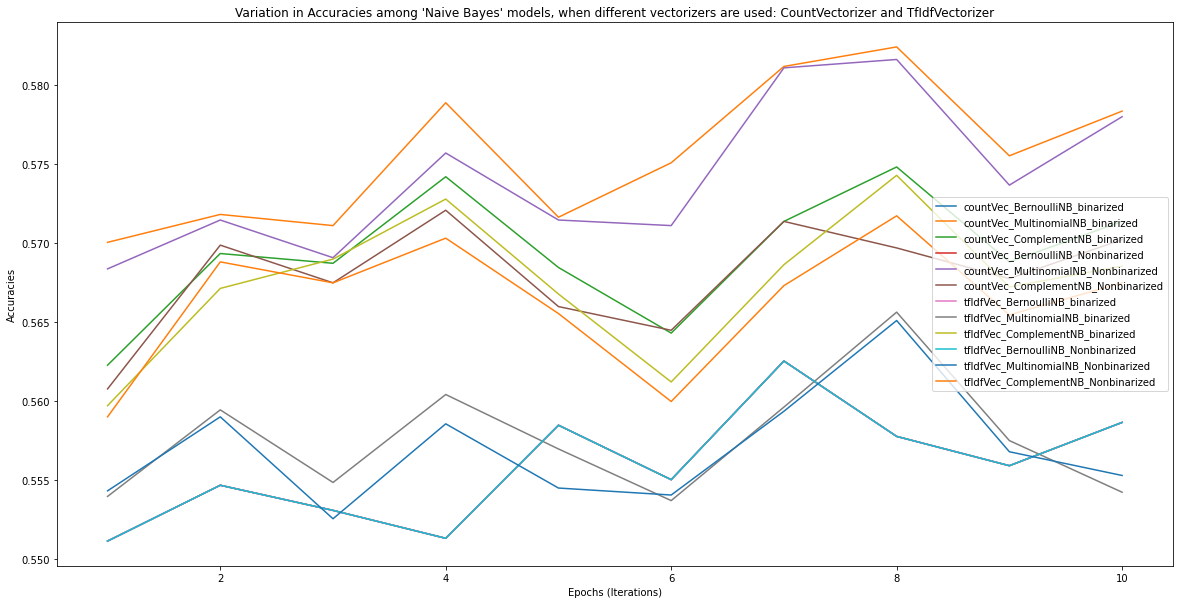

In [23]:
#Plotting the accuracies to display the variation in accuracies across the different models of NB
plt.figure(figsize=(20,10))
plt.title("Variation in Accuracies among 'Naive Bayes' models, when different vectorizers are used: CountVectorizer and TfIdfVectorizer")
plt.xlabel('Epochs (Iterations)')
plt.ylabel('Accuracies')
for column in results.columns:
        if column != 'Epoch':
                plt.plot(results['Epoch'],results[column],label=column)
plt.legend(loc="right")
plt.show()

## Getting the best from each simulation

### Method to map dataframe to a dictionary

In [71]:
def map_df_to_dict(series, model):
  for index in series.index.tolist()[1:]:
    model['Epoch'].append(series['Epoch'])
    model['Model'].append(index)
    model['Accuracy'].append(series[index])

### Mapping Results to a dictionary

In [75]:
models_acc = {'Epoch': [], 'Model': [], 'Accuracy': [] }
temp = results.apply(map_df_to_dict, axis=1, args=[models_acc])

In [76]:
models_acc_df = pd.DataFrame(models_acc)
models_acc_df

,Epoch,Model,Accuracy
0,1,countVec_BernoulliNB_binarized,0.551127
1,1,countVec_MultinomialNB_binarized,0.570040
2,1,countVec_ComplementNB_binarized,0.562262
3,1,countVec_BernoulliNB_Nonbinarized,0.551127
4,1,countVec_MultinomialNB_Nonbinarized,0.568361
...,...,...,...
115,10,tfIdfVec_MultinomialNB_binarized,0.554220
116,10,tfIdfVec_ComplementNB_binarized,0.568537
117,10,tfIdfVec_BernoulliNB_Nonbinarized,0.558639
118,10,tfIdfVec_MultinomialNB_Nonbinarized,0.555281


### Filtering Result for each simulation

In [82]:
filtered_results_df = pd.DataFrame(columns=models_acc_df.columns)
for epoch in sorted(list(models_acc_df['Epoch'].unique())):
  df = models_acc_df[models_acc_df['Epoch'] == epoch]
  max_acc_df = df[df['Accuracy'] == df['Accuracy'].max()]
  filtered_results_df = pd.concat([max_acc_df, filtered_results_df]).reset_index(drop=True)
filtered_results_df.sort_values('Epoch')

,Epoch,Model,Accuracy
9,1,countVec_MultinomialNB_binarized,0.570040
8,2,countVec_MultinomialNB_binarized,0.571807
7,3,countVec_MultinomialNB_binarized,0.571100
6,4,countVec_MultinomialNB_binarized,0.578878
5,5,countVec_MultinomialNB_binarized,0.571631
4,6,countVec_MultinomialNB_binarized,0.575077
3,7,countVec_MultinomialNB_binarized,0.581175
2,8,countVec_MultinomialNB_binarized,0.582413
1,9,countVec_MultinomialNB_binarized,0.575519
0,10,countVec_MultinomialNB_binarized,0.578347


## Conclusion

In [83]:
print("For each simulation, the following models give the best accuracy:")
filtered_results_df.sort_values('Epoch')

For each simulation, the following models give the best accuracy:


,Epoch,Model,Accuracy
9,1,countVec_MultinomialNB_binarized,0.570040
8,2,countVec_MultinomialNB_binarized,0.571807
7,3,countVec_MultinomialNB_binarized,0.571100
6,4,countVec_MultinomialNB_binarized,0.578878
5,5,countVec_MultinomialNB_binarized,0.571631
4,6,countVec_MultinomialNB_binarized,0.575077
3,7,countVec_MultinomialNB_binarized,0.581175
2,8,countVec_MultinomialNB_binarized,0.582413
1,9,countVec_MultinomialNB_binarized,0.575519
0,10,countVec_MultinomialNB_binarized,0.578347
